In [ ]:
#@title Practical Deep Learning

%%html
<style>
  img {border:3px solid #EAF6F6;
      border-radius: 50%;
      width: 150px;}
  .info{
    padding-left: 20px;
  }
</style>

<table>
  <tr>
    <td><img src="https://media-exp1.licdn.com/dms/image/C5603AQH3ZVutU1lbSQ/profile-displayphoto-shrink_400_400/0/1540929830980?e=1631145600&v=beta&t=kb8AhgnwuunEIupnjEU1R_NPkwZCZhdyrsB_RdjdKSI" /></td>
    <td class="info">
      <h1>Ala Alam Falaki</h1>
      <h3>PhD Candidate <small><i>(@UofW)</i></small></h3>
        Research Interest:<br />
        <ul>
          <li>Natural Language Processing</li>
          <li>Generative Models</li>
          <li>Automatic Text Summarization</li>
        </ul>
    </td>
  </tr>
</table>

,Ala Alam Falaki PhD Candidate (@UofW) Research Interest: Natural Language Processing Generative Models Automatic Text Summarization


# Part 1: Sentiment Analysis (Text Classification)

* Code-first Approach to Deep Learning
* Focus on FastAI library.
 * Get near SOTA score with minimal code



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# How to use Google Colab?

> There are two types of cells:
> *   Text
> *   Code 
> 
> You can run each cell by pressing on the ▶️ button at its left side, or press "Command+Enter" ("Ctrl+Enter" for Windows).



In [ ]:
a = 2
b = 2

print( a + b )

4


> You can also call Linux command in the code cells by putting a "!" before them.

In [ ]:
!ls

aclImdb  imdb-word2vec.model  sample_data


> And, you have access to free GPU for ~12 hours per day. <br />
> From the top menu, select "Runtime > Change Runtime Type" and you can select from 3 options: <br />
> 1. None: Run your codes on CPU
> 2. GPU
> 3. TPU



# Install FastAI2

> Run the cell below to install FastAI2. <br /><br />
> ⚠️ Make sure to restart the current runtime after the installation for changes to affect. Select 'Runtime' From the top menu and click on 'Restart Runtime'.

In [ ]:
!pip install -Uq fastai

# How to Feed Text to Neural Network?

> Comparing to Vision, there is an extra step (called tokenization) to feed data to NN models.

> 1. Concatenate the dataset
> 2. Tokenize
> 3. Make a vacabulary
> 4. **Chose the Represenation!**

> Let's see an example:

## 1. Concatenate

In [ ]:
dataset = ["She went to the stadium", "It's going to be legendary"]

In [ ]:
dataset_merged = " ".join( dataset )

In [ ]:
dataset_merged

"She went to the stadium It's going to be legendary"

## 2. Tokenize

<center><img src="https://miro.medium.com/max/3840/1*RcSo3UpBTorMI6YJvVizSg.jpeg" width="60%" /></center>

In [ ]:
dataset_merged = array( dataset_merged.split(" ") )

print(dataset_merged)

['She' 'went' 'to' 'the' 'stadium' "It's" 'going' 'to' 'be' 'legendary']


## 3. Make Vacabulary

> Make a list of all the unique tokens with their respective indexes.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder   = LabelEncoder()
label_encoder.fit( dataset_merged )

print( "Vocabs:", label_encoder.classes_ )
print( "indexes:", [i for i in range(0, 9)])
print( "Number of Vocabs:", len(label_encoder.classes_) )

Vocabs: ["It's" 'She' 'be' 'going' 'legendary' 'stadium' 'the' 'to' 'went']
indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of Vocabs: 9


> ⚠️ It is not possible to make a vocabulary of all the available words in the document in real-world applications. We will only pick the most frequent words. There is always an special "Unknown" token to deal with Out Of Vocabulary (OOV) tokens.

In [ ]:
encoded = label_encoder.fit_transform( dataset_merged )

encoded = encoded.reshape(len(encoded), 1)
print(encoded)

[[1]
 [8]
 [7]
 [6]
 [5]
 [0]
 [3]
 [7]
 [2]
 [4]]


## 4. Representation: 1-hot Encoding

It's|She|be|going|legendary|stadium|the|to|went|↓
-|-|-|-|-|-|-|-|-|-
0|0|0|0|0|0|0|0|0|-
1|0|0|0|0|0|0|0|0|It's
0|1|0|0|0|0|0|0|0|She
0|0|1|0|0|0|0|0|0|be

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(encoded)
print(onehot_encoded)

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


> One-hot encoding is not a good representation. Most of the indexes in the vector do not hold any meaningful information (0s), and the indexes that are 1s, do not provide a measure of similarity!

## 4. Representation: What is Word2Vec?





<center> <img width="400" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/word2vec.png" /> </center>


> Word2Vec [2] is a self-supervised algorithm to create meaningful embedding for words. The pre-trained version of the model that trained on large corpus (like wikipedia) is available for downloading. It try to predict the neighbor words (*w(t-2), w(t-1), w(t+1), w(t+2)*) given a *w(t)* word during training process. [Read More](https://jalammar.github.io/illustrated-word2vec/)<br />
> Let's load the model and see how powerful it is.

### Load the pre-trained model

In [ ]:
# !wget -P /content/sample_data/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-07-10 00:47:08--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.81.195
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.81.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/content/sample_data/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  43.9MB/s    in 37s     

2021-07-10 00:47:45 (42.9 MB/s) - ‘/content/sample_data/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors

pretrained_model = '/content/sample_data/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(pretrained_model, binary=True)

In [ ]:
word_vectors['beautiful']

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

In [ ]:
word_vectors.most_similar("beautiful", topn=10)

[('gorgeous', 0.8353004455566406),
 ('lovely', 0.810693621635437),
 ('stunningly_beautiful', 0.7329413890838623),
 ('breathtakingly_beautiful', 0.7231341004371643),
 ('wonderful', 0.6854087114334106),
 ('fabulous', 0.6700063943862915),
 ('loveliest', 0.6612576246261597),
 ('prettiest', 0.6595001816749573),
 ('beatiful', 0.6593326330184937),
 ('magnificent', 0.6591402292251587)]

> vector['woman'] + vector['king'] - vecotr['man'] = ?


In [ ]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [ ]:
word_vectors.most_similar(positive=['small', 'smaller'], negative=['large'], topn=1)

[('larger', 0.595083475112915)]

### Train our own Word2Vec Model



> What if we have a lot of Out Of Vocabulary (OOV) words in our dataset? We can train our own Word2Vec model! It will not be as powerful as the pre-trained one, but it might be better suited for our application.<br />
Start with downloading and loading the IMDB 50K Movie reviews dataset [2].



In [ ]:
!wget -P /content/sample_data/ -c "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!tar -xzf /content/sample_data/aclImdb_v1.tar.gz

--2021-07-06 02:38:05--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘/content/sample_data/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  29.0MB/s    in 2.8s    

2021-07-06 02:38:08 (29.0 MB/s) - ‘/content/sample_data/aclImdb_v1.tar.gz’ saved [84125825/84125825]





> Our database consists of 50K individual text files that holds each review. We need to write a function to read all the single reviews into a list to use them more easily.




In [ ]:
from os import listdir 
from tqdm.notebook import tqdm
import gensim

def path_to_list(path, preprocess=True):

  print( "Reading the '{}' Directory files:".format(path) )
  files_names_list = listdir( path )
  dataset = []
  
  for file_name in tqdm( files_names_list ):

    with open( path + file_name ) as f:
      if preprocess:
        dataset.append( gensim.utils.simple_preprocess ( f.readlines()[0] ) )
      else:
        dataset.append( f.readlines()[0] )
  
  return dataset

In [ ]:
preprocessing = True
files_path    = "./aclImdb/train/{}/"

# For Negative Reviews
fp = files_path.format('neg')
negative_dataset = path_to_list( fp, preprocessing )

# For Positive Reviews
fp = files_path.format('pos')
positive_dataset = path_to_list( fp, preprocessing )

# Put both together
dataset = negative_dataset + positive_dataset

print(
"""
Number of positive samples: {}
Number of Negative samples: {}
Total Dataset Size        : {}
""".format(len(negative_dataset), len(positive_dataset), len(dataset))
)

Reading the './aclImdb/train/neg/' Directory files:



Reading the './aclImdb/train/pos/' Directory files:




Number of positive samples: 12500
Number of Negative samples: 12500
Total Dataset Size        : 25000





> Now, we can train a Word2Vec model just for the IMDB dataset.



In [ ]:
model = gensim.models.Word2Vec(dataset, size=150, window=10, min_count=2, workers=10)
model.train(dataset,total_examples=len(dataset), epochs=10)

(42891268, 56531940)

> [Documentation](https://radimrehurek.com/gensim_3.8.3/models/word2vec.html#gensim.models.word2vec.Word2Vec.trainables) <br /><br />
> Now, we can save/load the model for future use.

In [ ]:
model.save("./imdb-word2vec.model")

In [ ]:
model = gensim.models.Word2Vec.load("imdb-word2vec.model")

In [ ]:
model.wv.most_similar("beatiful")

[('bride', 0.4520919919013977),
 ('artie', 0.3967897593975067),
 ('ghillie', 0.39270034432411194),
 ('hostess', 0.38479578495025635),
 ('brant', 0.3816797733306885),
 ('lover', 0.3797268569469452),
 ('premier', 0.3785325586795807),
 ('counterpart', 0.37571626901626587),
 ('wedding', 0.37087419629096985),
 ('bffs', 0.36623677611351013)]

## Language Models

> Word2Vec was the first example of using transfer learning in Natural Language Processing. And a very powerful one as well! But, the problem is, it always generates the same vector for a word, no matter what the context is. The context matters in NLP! Alot!


<center> <img src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/iamahugemetalfan.jpeg" width="500" />

<small>Credit: not found.</small>
 </center>

> Here comes the language models. We feed them a text, they try to predict the next word!

<center> <img width="500" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/lm.png" /> <center>

> As it turned out, they learn about language structure through this process. Let's see how they work, we start by importing the [FastAI](https://github.com/fastai/fastai) library, and load the Yelp dataset.

In [ ]:
from fastai.text.all import *

#### Load the LM Dataset

In [ ]:
path = untar_data(URLs.YELP_REVIEWS_POLARITY, dest="/content")
path

Path('/content/yelp_review_polarity_csv')

In [ ]:
df = pd.read_csv(path/"train.csv", header=0, names=['label', 'text'])
df = df[0:len( df )//2]
df.head()

,label,text
0,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
1,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
2,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
3,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
4,1,"Wing sauce is like water. Pretty much a lot of butter and some hot sauce (franks red hot maybe). The whole wings are good size and crispy, but for $1 a wing the sauce could be better. The hot and extra hot are about the same flavor/heat. The fish sandwich is good and is a large portion, sides are decent."


In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', is_lm=True)
dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,text_
0,"xxbos xxmaj truly home cooking style xxmaj mexican food served by a friendly staff with the owners doing the cooking . xxmaj the xxmaj chile xxmaj rellenos are excellent , and my wife says the xxmaj enchiladas are the first she 's had in a restaurant that come close to her grand mother 's xxmaj new xxmaj mexico style xxmaj xxunk … xxmaj very reasonably priced and there is usually several sports","xxmaj truly home cooking style xxmaj mexican food served by a friendly staff with the owners doing the cooking . xxmaj the xxmaj chile xxmaj rellenos are excellent , and my wife says the xxmaj enchiladas are the first she 's had in a restaurant that come close to her grand mother 's xxmaj new xxmaj mexico style xxmaj xxunk … xxmaj very reasonably priced and there is usually several sports events"
1,"xxmaj my lasagna tasted xxup ok but the whole thing was crispy on the outside like it had been made earlier and once ordered , was put under a broiler . xxmaj my wife 's steak was very bland , tender , but not flavorful at all . xxmaj the waiter asked how her steak was and she replied , "" it 's xxup ok . "" xxmaj he said , ""","my lasagna tasted xxup ok but the whole thing was crispy on the outside like it had been made earlier and once ordered , was put under a broiler . xxmaj my wife 's steak was very bland , tender , but not flavorful at all . xxmaj the waiter asked how her steak was and she replied , "" it 's xxup ok . "" xxmaj he said , "" ok"


In [ ]:
# torch.save(dls, "./lm_dls.pkl")
# dls = torch.load("./lm_dls.pkl")

#### Load the model and fine-tune it

> We can call the language_model_learner function to load a pre-trained language model called ULMFiT [3] that is trained on a large corpuse. (Wikipedia-103) We can fine-tune it on any dataset to predict sentences with different style.

<center> <img width="800" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/ulmfit-architecture.png" /> </center>
<center> <small>credit: ULMFiT paper [3]</small> </center>

In [ ]:
learn = language_model_learner(dls, AWD_LSTM, metrics=accuracy).to_fp16()

In [ ]:
TEXT  = "my experience"
WORDS = 30

learn.predict(TEXT, WORDS)

'my experience routine screening muzzle grams of restraunt solution and DNA testing and detection screening , and a takamatsu security accident being considered in Australia , cardamom u00e9es for use'

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.159567,3.875395,0.283907,38:50


epoch,train_loss,valid_loss,accuracy,time
0,3.854867,3.648041,0.305992,41:24
1,3.804299,3.599025,0.310729,41:36


In [ ]:
TEXT  = "my experience"
WORDS = 30

learn.predict(TEXT, WORDS)

"my experience with this restaurant and the Cafe Downstairs were terrible . \n\n OK \n\n a good number of tasty food . \n\n Do n't let back tell"

In [ ]:
learn.save_encoder('lm_finetuned')

### Load the classification Dataset

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', seed=42)
dls.show_batch(max_n=3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxup warning . xxup do xxup not xxup go xxup here . \n\n xxmaj my family was visiting my sister in xxmaj pittsburgh and we had our eyes set on a specific restaurant , not xxmaj christos . a gentleman , i presume the owner of xxmaj christos , saw my family and i as we walked down the street . xxmaj he xxunk us his menu , xxunk to us why his restaurant was the best and why his food was the best . i could barely tell if he was selling food or used cars . i kindly told him we were not interested . xxmaj my family , however , was indecisive when it came to getting a restaurant . xxmaj we ending up wanting to go eat at the restaurant next door to xxmaj christos so we xxunk . xxmaj again the owner xxunk us",1
1,"xxbos xxmaj short story : the guy smeared the sole rubber all over the shaft of my boots , said he did n't do it , tried to clean it up and took out some of the leather 's dye instead , and did n't give me a refund ( i 'd already paid ) . xxmaj xxunk the story : if you risk this dude , only pay him at the end after you check for xxunk . xxmaj long story below . \n\n xxmaj oh , xxmaj groupon , you 've xxunk me wrong yet again . i have awful luck with service at places were xxmaj i 've used xxmaj groupons overall … hey , you put out a xxmaj groupon to bring in customers , not to be pissed when said customers show up for their discounts ! basically , i think the cobbler screwed me",1
2,"xxbos xxmaj for our last lunch in xxmaj pittsburgh we decided to return to the xxmaj big xxmaj burrito xxmaj group ; xxmaj eleven was quite good and both xxmaj xxunk and xxmaj pittsburgh xxmaj magazine compared the experience at xxmaj casbah xxunk to that of xxmaj big xxmaj burrito 's crown xxunk . xxmaj xxunk a mix of xxmaj mediterranean and xxmaj xxunk xxmaj african xxunk with a bargain xxmaj xxunk xxmaj gusto xxmaj menu for lunch and the option for indoor or al xxunk dining it seemed as if xxmaj casbah was a ca n't miss option … well , sometimes things do n't turn out quite as you expect - almost everything that xxunk from the moment we arrived until the moment we left was a xxunk . \n\n xxmaj when our server , a young woman named xxmaj amanda l who would xxunk quite xxunk and",1


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

In [ ]:
learn = learn.load_encoder('lm_finetuned')

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.248143,0.194592,0.921713,13:18


epoch,train_loss,valid_loss,accuracy,time
0,0.141901,0.123398,0.951892,31:57
1,0.122073,0.110710,0.956892,31:57


In [ ]:
learn.save("finetuned_cls")

Path('models/finetuned_cls.pth')

In [ ]:
print( learn.predict("I really like this restaurant.") )
print( learn.predict("Not so good restaurant.") )

('2', tensor(1), tensor([0.0074, 0.9926]))


('1', tensor(0), tensor([0.9972, 0.0028]))


#### Fine-Tune Just the Classifier

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.411878,0.325700,0.864873,13:09


epoch,train_loss,valid_loss,accuracy,time
0,0.207787,0.158585,0.936124,31:52
1,0.157511,0.145399,0.943410,31:51


In [ ]:
learn.save("cls")

Path('models/cls.pth')

### Let's look under the hood

> We will look at a basic implementation of a simple text classifier. You will see the model's implementation with PyTorch and learn how to find the best learning rate and do the training loop using FastAI.

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', seed=42)
dls.show_batch(max_n=3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj oh , xxup t.i . xxmaj you should be xxup ashamed to even call this a "" buffet . "" \n\n xxmaj we got comped , so we checked it out , and decided "" what the heck . "" xxmaj unfortunately , we 'd checked it out at late breakfast time , and actually did the whole "" eating "" part at dinner . xxmaj breakfast , if small in selection , at least looked decent . xxmaj dinner ? \n\n xxmaj oh . xxmaj em . xxmaj gee . \n\n xxmaj first of all , i really hope xxup every person ( all 6 of them ) at the buffet that evening were also xxmaj comped . xxmaj because seriously ? xxmaj if xxmaj i 'd paid $ 22 for that "" selection "" of foods , xxmaj i 'd be calling the xxmaj better xxmaj",1
1,"xxbos xxmaj first the good : xxmaj i 've spent many , many hours in the xxup gn , mostly in their poker room , which i believe is one of the best - run rooms in town . xxmaj quick shout out to some of the best of the best : xxmaj floor : xxmaj vito , xxmaj dealers : xxmaj marlon , xxmaj pete , xxmaj toni , and many , many others , and xxmaj server : xxmaj elizabeth . \n\n xxmaj and the not - so - good - the hotel itself . \n\n xxmaj day 1 : \n xxmaj check in was nothing unusual for xxmaj vegas . xxmaj the customer service agent ( guy ) was not anything xxmaj i 'd consider friendly or overly helpful . 80 % businesslike , 20 % arrogant douchebag . \n\n xxmaj we were in the xxmaj carson",1
2,"xxbos i xxup am xxup boycotting xxup alexander 's xxup for xxup life xxrep 3 ! xxmaj the manager xxup screamed xxup at xxup me at the top of his lungs in an epic meltdown that lasted 10 minutes ! \n\n xxmaj on xxmaj sat . , xxmaj april 12 , 2014 , i attended the 50th birthday party for my dear friend , xxmaj david xxmaj flynn . i organized the party , but relied on xxmaj dave and his sister to provide me with the final head count . i made the reservation for 25 people . \n\n xxmaj the manager and i played phone tag for the two days before the event . i called back and left messages xxup twice to confirm , but apparently he never got my messages . ( this was part of his rant , his indignation at unreturned phone calls that",1


<center> <img width="500" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/linear-layer.png" /> </center>

> Recurent Neural Networks (RNNs) <br />
> The problem with feedforward (Linear layers) is the inability to capture context easily. They look at each input indepandantly. But, RNNs will take previous seen tokens into account by a "memory" concept.

> <center> <img width="500" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/rnn.png" /> </center>
> <center> <small> Credit: Colah's blog </small> </center>

> A problem with these architecture was the vanishing/exploding gradient. So, we will use LSTM cells to overcome this issue.

> <center> <img width="600" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/lstm.png" /> </center>
> <center> <small> Credit: Colah's blog </small> </center>

> Read more about all the LSTM gates in more details [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [ ]:
class LM(Module):
  def __init__(self, vocab_size):
    self.hidden_size = 300
    self.number_of_layers = 3
    self.number_of_targets = 2

    self.emb        = nn.Embedding(vocab_size, self.hidden_size)
    self.encoder    = nn.LSTM(self.hidden_size, self.hidden_size, self.number_of_layers, batch_first=True)
    self.classifier  = nn.Linear(self.hidden_size, self.number_of_targets)

  def forward(self, inp):

    inp_embded = self.emb(inp)
    _, hidden_state = self.encoder(inp_embded)

    cls = self.classifier( hidden_state[0][-1] )
    
    return cls

In [ ]:
learn = Learner(dls, LM(len(dls.vocab[0])),
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(valley=tensor(0.0004))

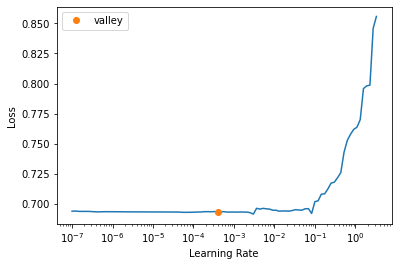

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 4e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.327235,0.321058,0.923409,07:39


> Let's have break, We will look closely at some components in Part 2.

# References

1. *Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301.3781.*

2. *Maas, A., Daly, R., Pham, P., Huang, D., Ng, A., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies (pp. 142–150). Association for Computational Linguistics.*

3. *Howard, J., & Ruder, S. (2018). Universal language model fine-tuning for text classification. arXiv preprint arXiv:1801.06146.*